# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Reading and understanding the data-set

In [2]:
data=pd.read_csv("vehicle.csv")

In [3]:
#Checking the head of the data
data.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107          NaN                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0           NaN   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            1

In [4]:
#Checking the dtypes of the data
data.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

#### All the attributes excpet class is of integer or float, class will be dropped as it defeats the purpose of an unsupervised learning model

In [5]:
#Checking the information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

#### We can infer that there are some null values in the following attributes,
##### Circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, scatter_ratio, elongatedness,pr.axis_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2 

In [6]:
# Checking the shape of the data
data.shape

(846, 19)

#### We can infer that we have 846 records with 18 independent attributes excluding class attribute

In [7]:
#To check if there are any null values present
nulllvalues=data.isnull().sum()
print(nulllvalues)

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64


#### We can infer that there are some null values in the following attributes,
##### Circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, scatter_ratio, elongatedness,pr.axis_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2 

In [8]:
# Filling the Null values with the median of the column
data=data.fillna(data.median())
data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [9]:
#To check if there are any NaN values present
NaNvalues=data.isna().sum()
print(NaNvalues)

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64


#### All null values have been replaced with their median

In [10]:
# To describe the data- Five point summary
data.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0

#### Mean of scatter_ratio, elongatedness, scaled_variance, scaled_variance.1 is not in sync with the median which infers that they have outliers

## Exploratory Data Analytics

### Univariate Analysis

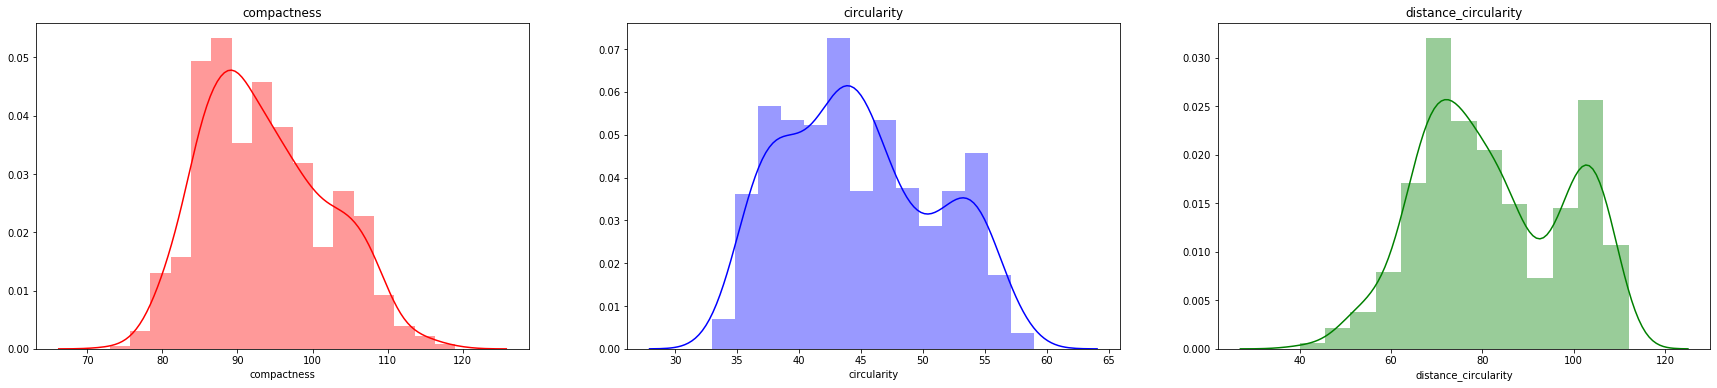

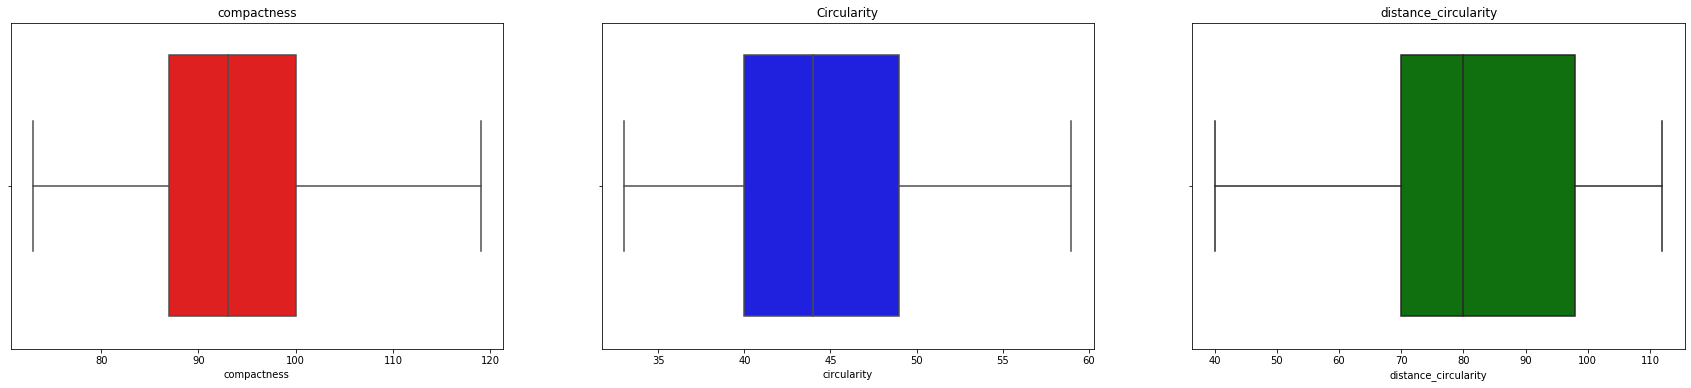

In [11]:
#Distribution of continous data

plt.figure(figsize=(30,6))

#Subplot 1
plt.subplot(1,3,1)
plt.title('compactness')
sns.distplot(data['compactness'],color='red')

#Subplot 2
plt.subplot(1,3,2)
plt.title('circularity')
sns.distplot(data['circularity'],color='blue')

#Subplot 3
plt.subplot(1,3,3)
plt.title('distance_circularity')
sns.distplot(data['distance_circularity'],color='green')



plt.figure(figsize=(30,6))

#Subplot 1- Boxplot
plt.subplot(1,3,1)
plt.title('compactness')
sns.boxplot(data['compactness'],orient='horizondal',color='red')

#Subplot 2
plt.subplot(1,3,2)
plt.title('Circularity')
sns.boxplot(data['circularity'],orient='horizondal',color='blue')

#Subplot 3
plt.subplot(1,3,3)
plt.title('distance_circularity')
sns.boxplot(data['distance_circularity'],orient='horizondal',color='green')


#### Average compactness is between 85 and 100
#### Average Circularity is between 40 and 48
#### Average distance_circularity is between 70 and 100
#### There are no outliers

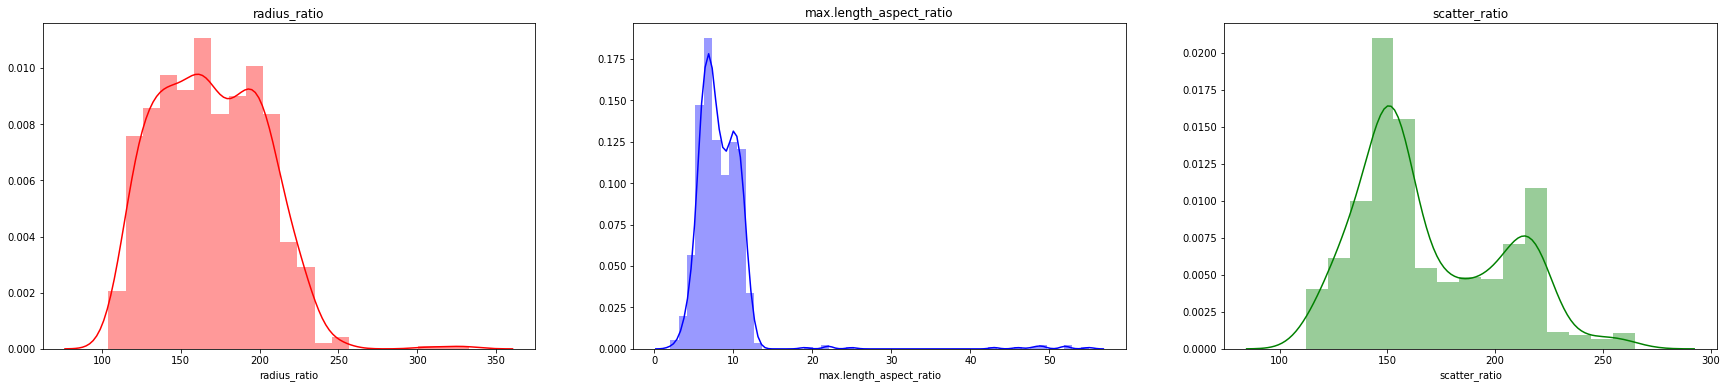

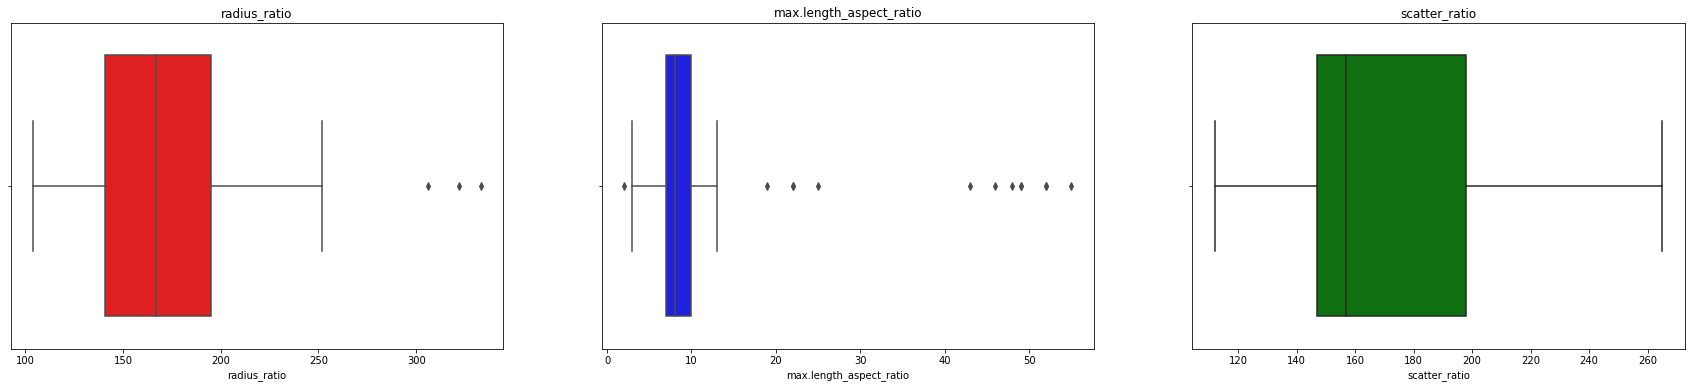

In [12]:
#Distribution of continous data

plt.figure(figsize=(30,6))

#Subplot 1
plt.subplot(1,3,1)
plt.title('radius_ratio')
sns.distplot(data['radius_ratio'],color='red')

#Subplot 2
plt.subplot(1,3,2)
plt.title('max.length_aspect_ratio')
sns.distplot(data['max.length_aspect_ratio'],color='blue')

#Subplot 3
plt.subplot(1,3,3)
plt.title('scatter_ratio')
sns.distplot(data['scatter_ratio'],color='green')



plt.figure(figsize=(30,6))

#Subplot 1- Boxplot
plt.subplot(1,3,1)
plt.title('radius_ratio')
sns.boxplot(data['radius_ratio'],orient='horizondal',color='red')

#Subplot 2
plt.subplot(1,3,2)
plt.title('max.length_aspect_ratio')
sns.boxplot(data['max.length_aspect_ratio'],orient='horizondal',color='blue')

#Subplot 3
plt.subplot(1,3,3)
plt.title('scatter_ratio')
sns.boxplot(data['scatter_ratio'],orient='horizondal',color='green')


#### Average radius_ratio is between 140 and 200 and there are some outliers
#### Max_length_aspect_ratio is between 7 and 10 with some amount of outliers
#### scatter_ratio is between 150 and 200

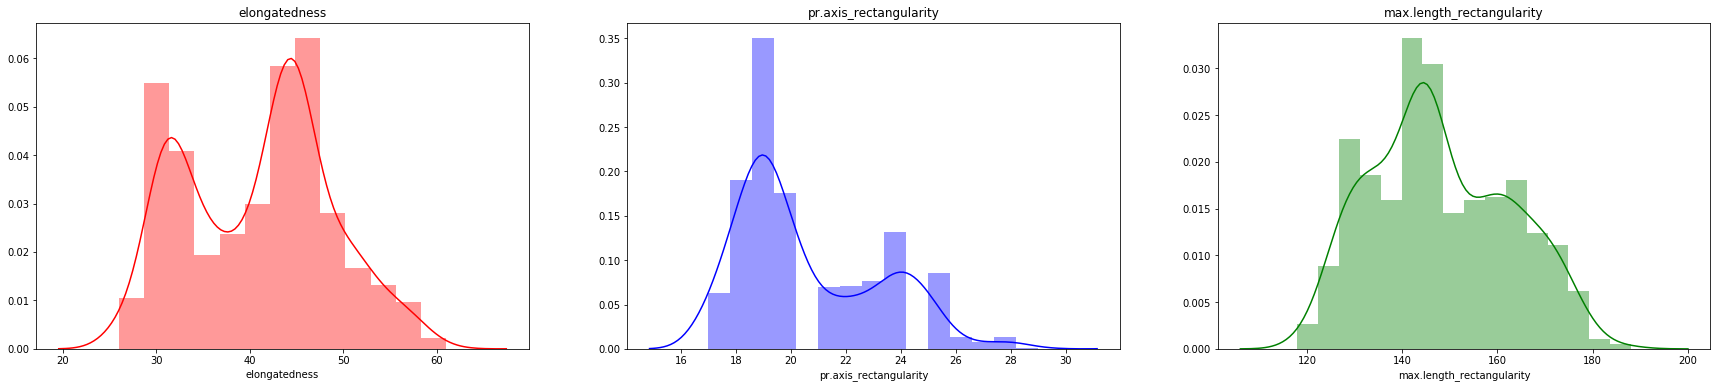

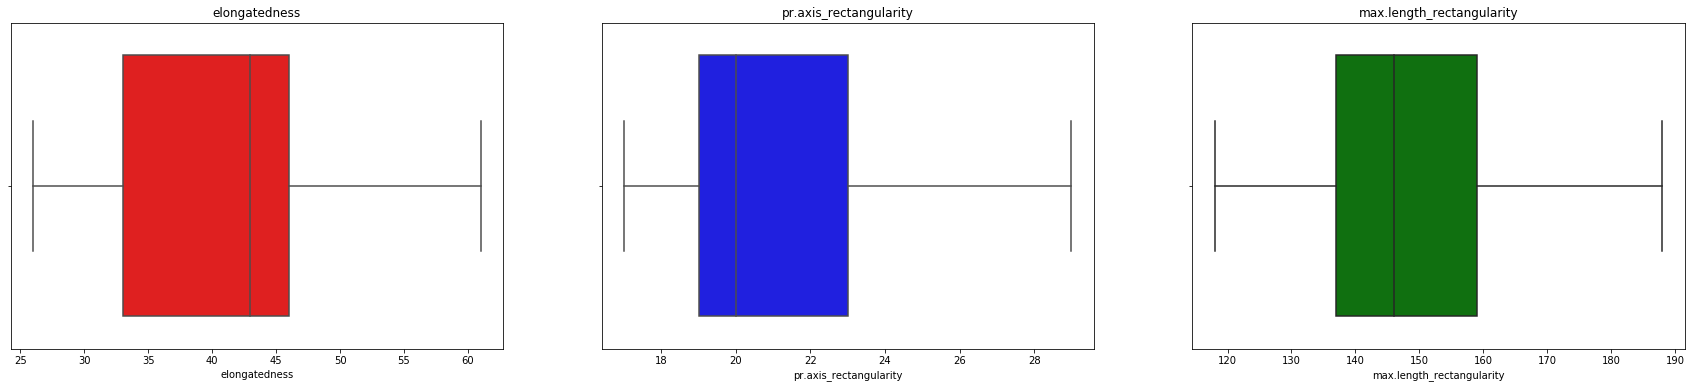

In [13]:
#Distribution of continous data

plt.figure(figsize=(30,6))

#Subplot 1
plt.subplot(1,3,1)
plt.title('elongatedness')
sns.distplot(data['elongatedness'],color='red')

#Subplot 2
plt.subplot(1,3,2)
plt.title('pr.axis_rectangularity')
sns.distplot(data['pr.axis_rectangularity'],color='blue')

#Subplot 3
plt.subplot(1,3,3)
plt.title('max.length_rectangularity')
sns.distplot(data['max.length_rectangularity'],color='green')



plt.figure(figsize=(30,6))

#Subplot 1- Boxplot
plt.subplot(1,3,1)
plt.title('elongatedness')
sns.boxplot(data['elongatedness'],orient='horizondal',color='red')

#Subplot 2
plt.subplot(1,3,2)
plt.title('pr.axis_rectangularity')
sns.boxplot(data['pr.axis_rectangularity'],orient='horizondal',color='blue')

#Subplot 3
plt.subplot(1,3,3)
plt.title('max.length_rectangularity')
sns.boxplot(data['max.length_rectangularity'],orient='horizondal',color='green')


#### Average elongatedness is between 35 and 45
#### Average pr.axis_regtangularity is between 19 and 23
#### Average max_length_rectangularity between 140 and 160
#### There are no outliers

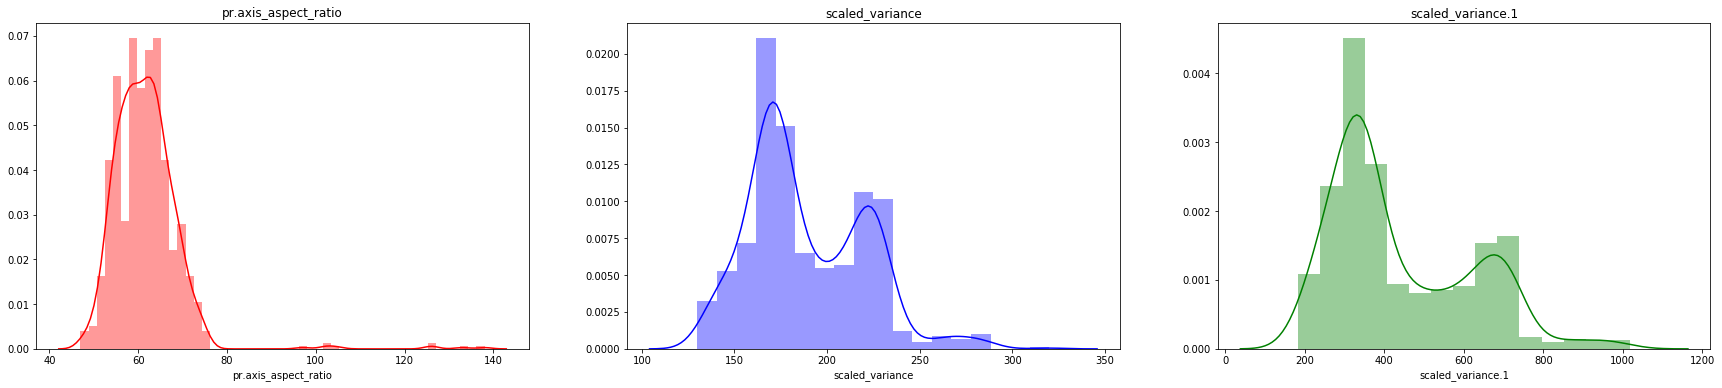

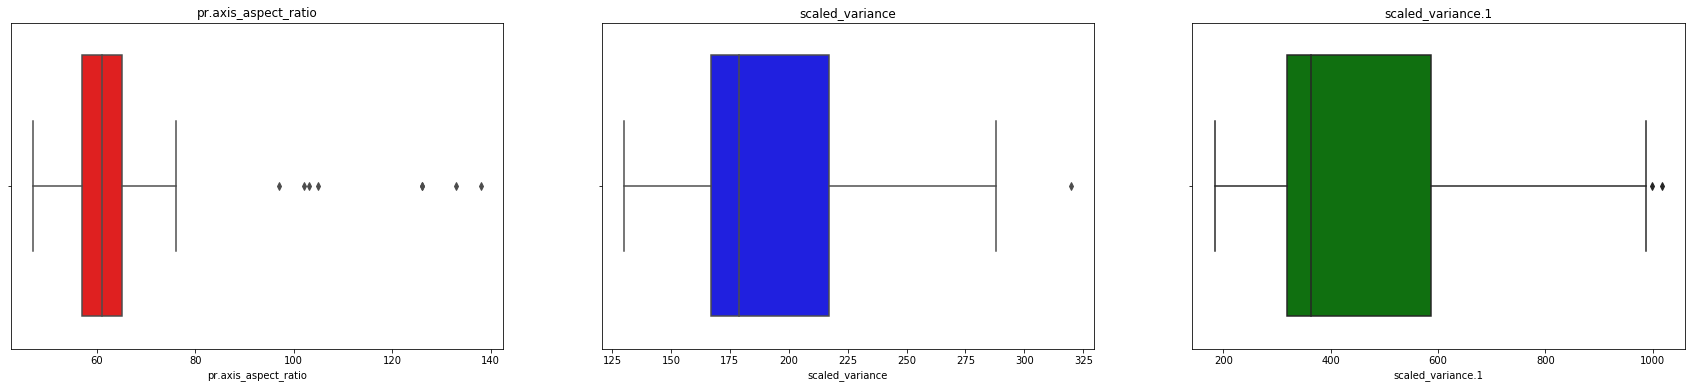

In [14]:
#Distribution of continous data

plt.figure(figsize=(30,6))

#Subplot 1
plt.subplot(1,3,1)
plt.title('pr.axis_aspect_ratio')
sns.distplot(data['pr.axis_aspect_ratio'],color='red')

#Subplot 2
plt.subplot(1,3,2)
plt.title('scaled_variance')
sns.distplot(data['scaled_variance'],color='blue')

#Subplot 3
plt.subplot(1,3,3)
plt.title('scaled_variance.1')
sns.distplot(data['scaled_variance.1'],color='green')



plt.figure(figsize=(30,6))

#Subplot 1- Boxplot
plt.subplot(1,3,1)
plt.title('pr.axis_aspect_ratio')
sns.boxplot(data['pr.axis_aspect_ratio'],orient='horizondal',color='red')

#Subplot 2
plt.subplot(1,3,2)
plt.title('scaled_variance')
sns.boxplot(data['scaled_variance'],orient='horizondal',color='blue')

#Subplot 3
plt.subplot(1,3,3)
plt.title('scaled_variance.1')
sns.boxplot(data['scaled_variance.1'],orient='horizondal',color='green')
    

#### Average pr.axis_aspect_ratio is between 55 and 65 and there are some outliers
#### scaled_variance is between 170 and 275 with some amount of outliers
#### scaled_variance1 is between 375 and 600 with some amount of outliers

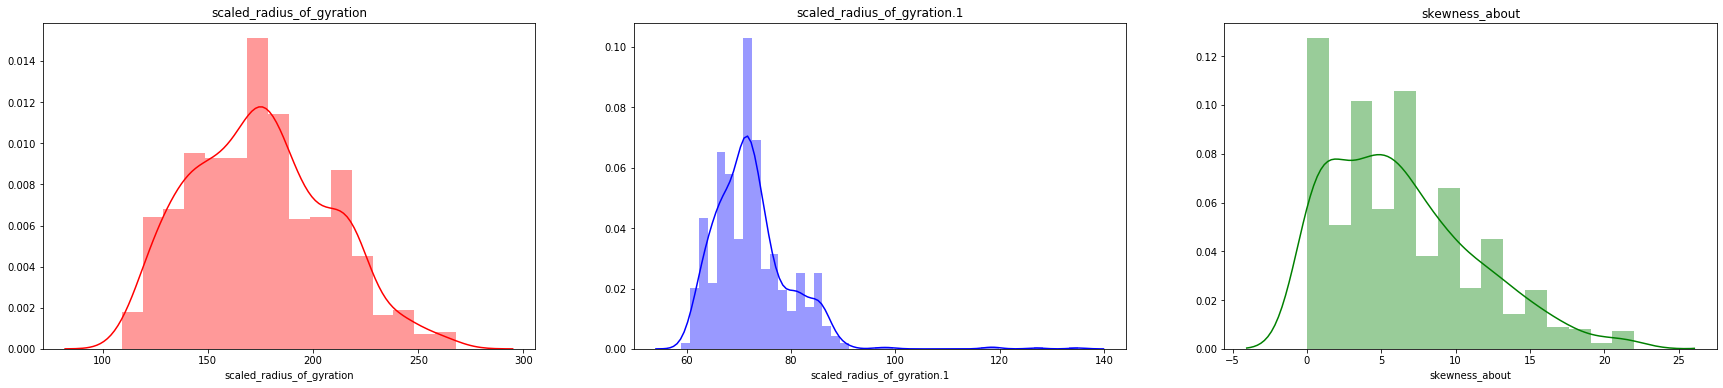

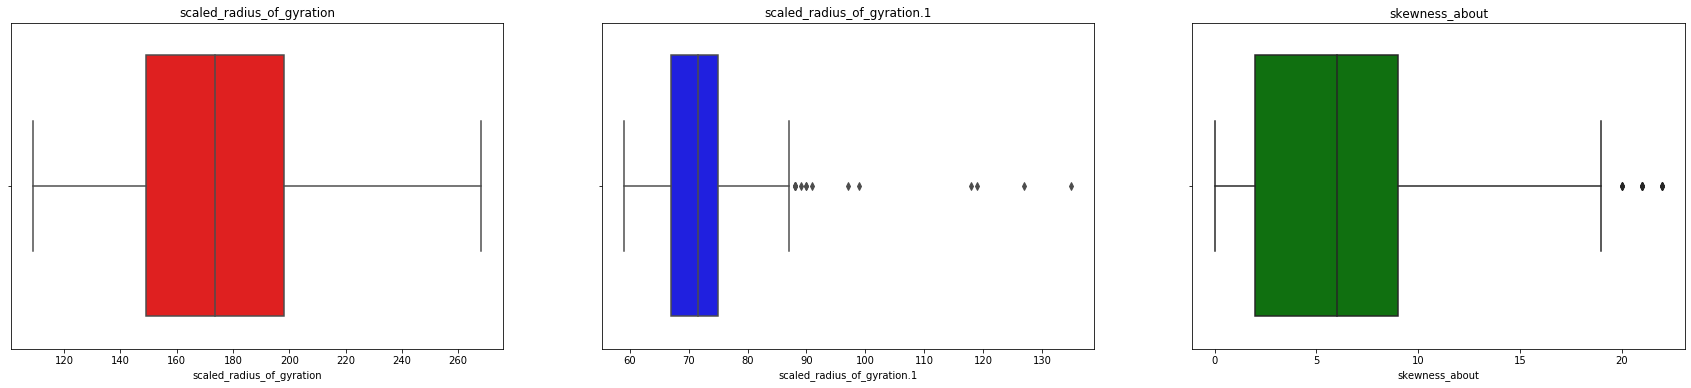

In [15]:
#Distribution of continous data

plt.figure(figsize=(30,6))

#Subplot 1
plt.subplot(1,3,1)
plt.title('scaled_radius_of_gyration')
sns.distplot(data['scaled_radius_of_gyration'],color='red')

#Subplot 2
plt.subplot(1,3,2)
plt.title('scaled_radius_of_gyration.1')
sns.distplot(data['scaled_radius_of_gyration.1'],color='blue')

#Subplot 3
plt.subplot(1,3,3)
plt.title('skewness_about')
sns.distplot(data['skewness_about'],color='green')



plt.figure(figsize=(30,6))

#Subplot 1- Boxplot
plt.subplot(1,3,1)
plt.title('scaled_radius_of_gyration')
sns.boxplot(data['scaled_radius_of_gyration'],orient='horizondal',color='red')

#Subplot 2
plt.subplot(1,3,2)
plt.title('scaled_radius_of_gyration.1')
sns.boxplot(data['scaled_radius_of_gyration.1'],orient='horizondal',color='blue')

#Subplot 3
plt.subplot(1,3,3)
plt.title('skewness_about')
sns.boxplot(data['skewness_about'],orient='horizondal',color='green')
    

#### scaled_radius_of_gyration is between 145 and 200
#### scaled_radius_of_gyration.1 is between 65 and 75 with some amount of outliers
#### skewness_about is between 3 and 10 with some outliers

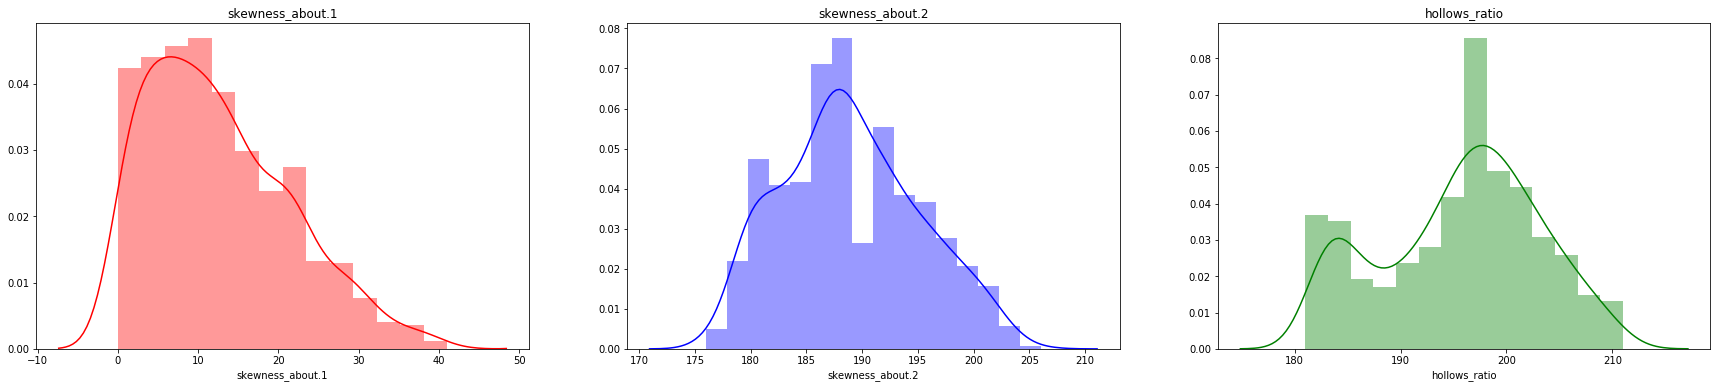

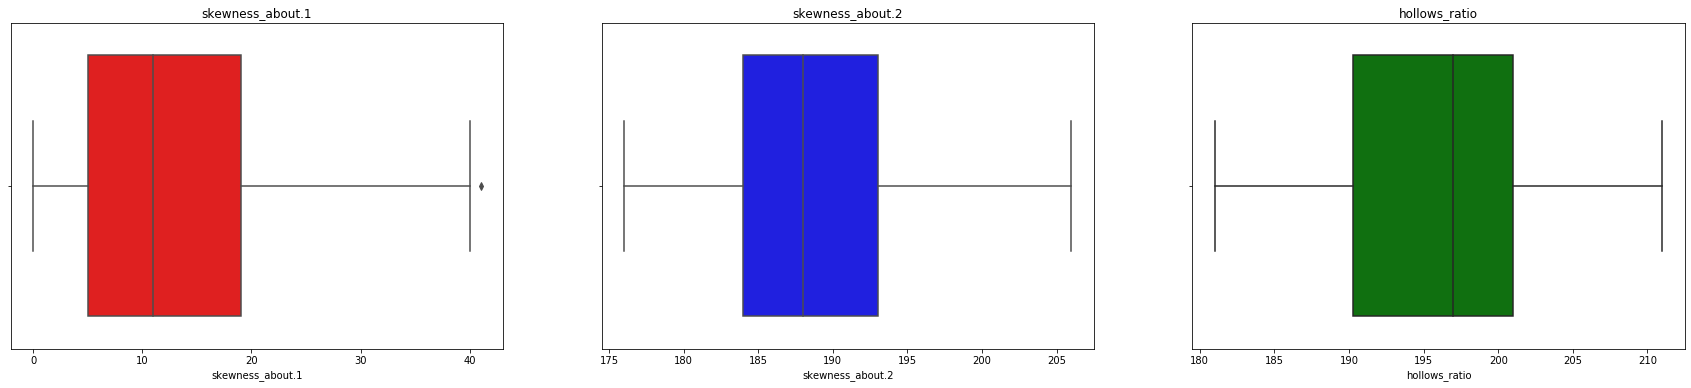

In [16]:
#Distribution of continous data

plt.figure(figsize=(30,6))

#Subplot 1
plt.subplot(1,3,1)
plt.title('skewness_about.1')
sns.distplot(data['skewness_about.1'],color='red')

#Subplot 2
plt.subplot(1,3,2)
plt.title('skewness_about.2')
sns.distplot(data['skewness_about.2'],color='blue')

#Subplot 3
plt.subplot(1,3,3)
plt.title('hollows_ratio')
sns.distplot(data['hollows_ratio'],color='green')



plt.figure(figsize=(30,6))

#Subplot 1- Boxplot
plt.subplot(1,3,1)
plt.title('skewness_about.1')
sns.boxplot(data['skewness_about.1'],orient='horizondal',color='red')

#Subplot 2
plt.subplot(1,3,2)
plt.title('skewness_about.2')
sns.boxplot(data['skewness_about.2'],orient='horizondal',color='blue')

#Subplot 3
plt.subplot(1,3,3)
plt.title('hollows_ratio')
sns.boxplot(data['hollows_ratio'],orient='horizondal',color='green')
    

#### skewness_about_1 is between 5 and 20 with some amount of outliers
#### kewness_about_2 is between 185 and 195 
#### hollows_ratio is between 190 and 200

### Multi-variate analyisis

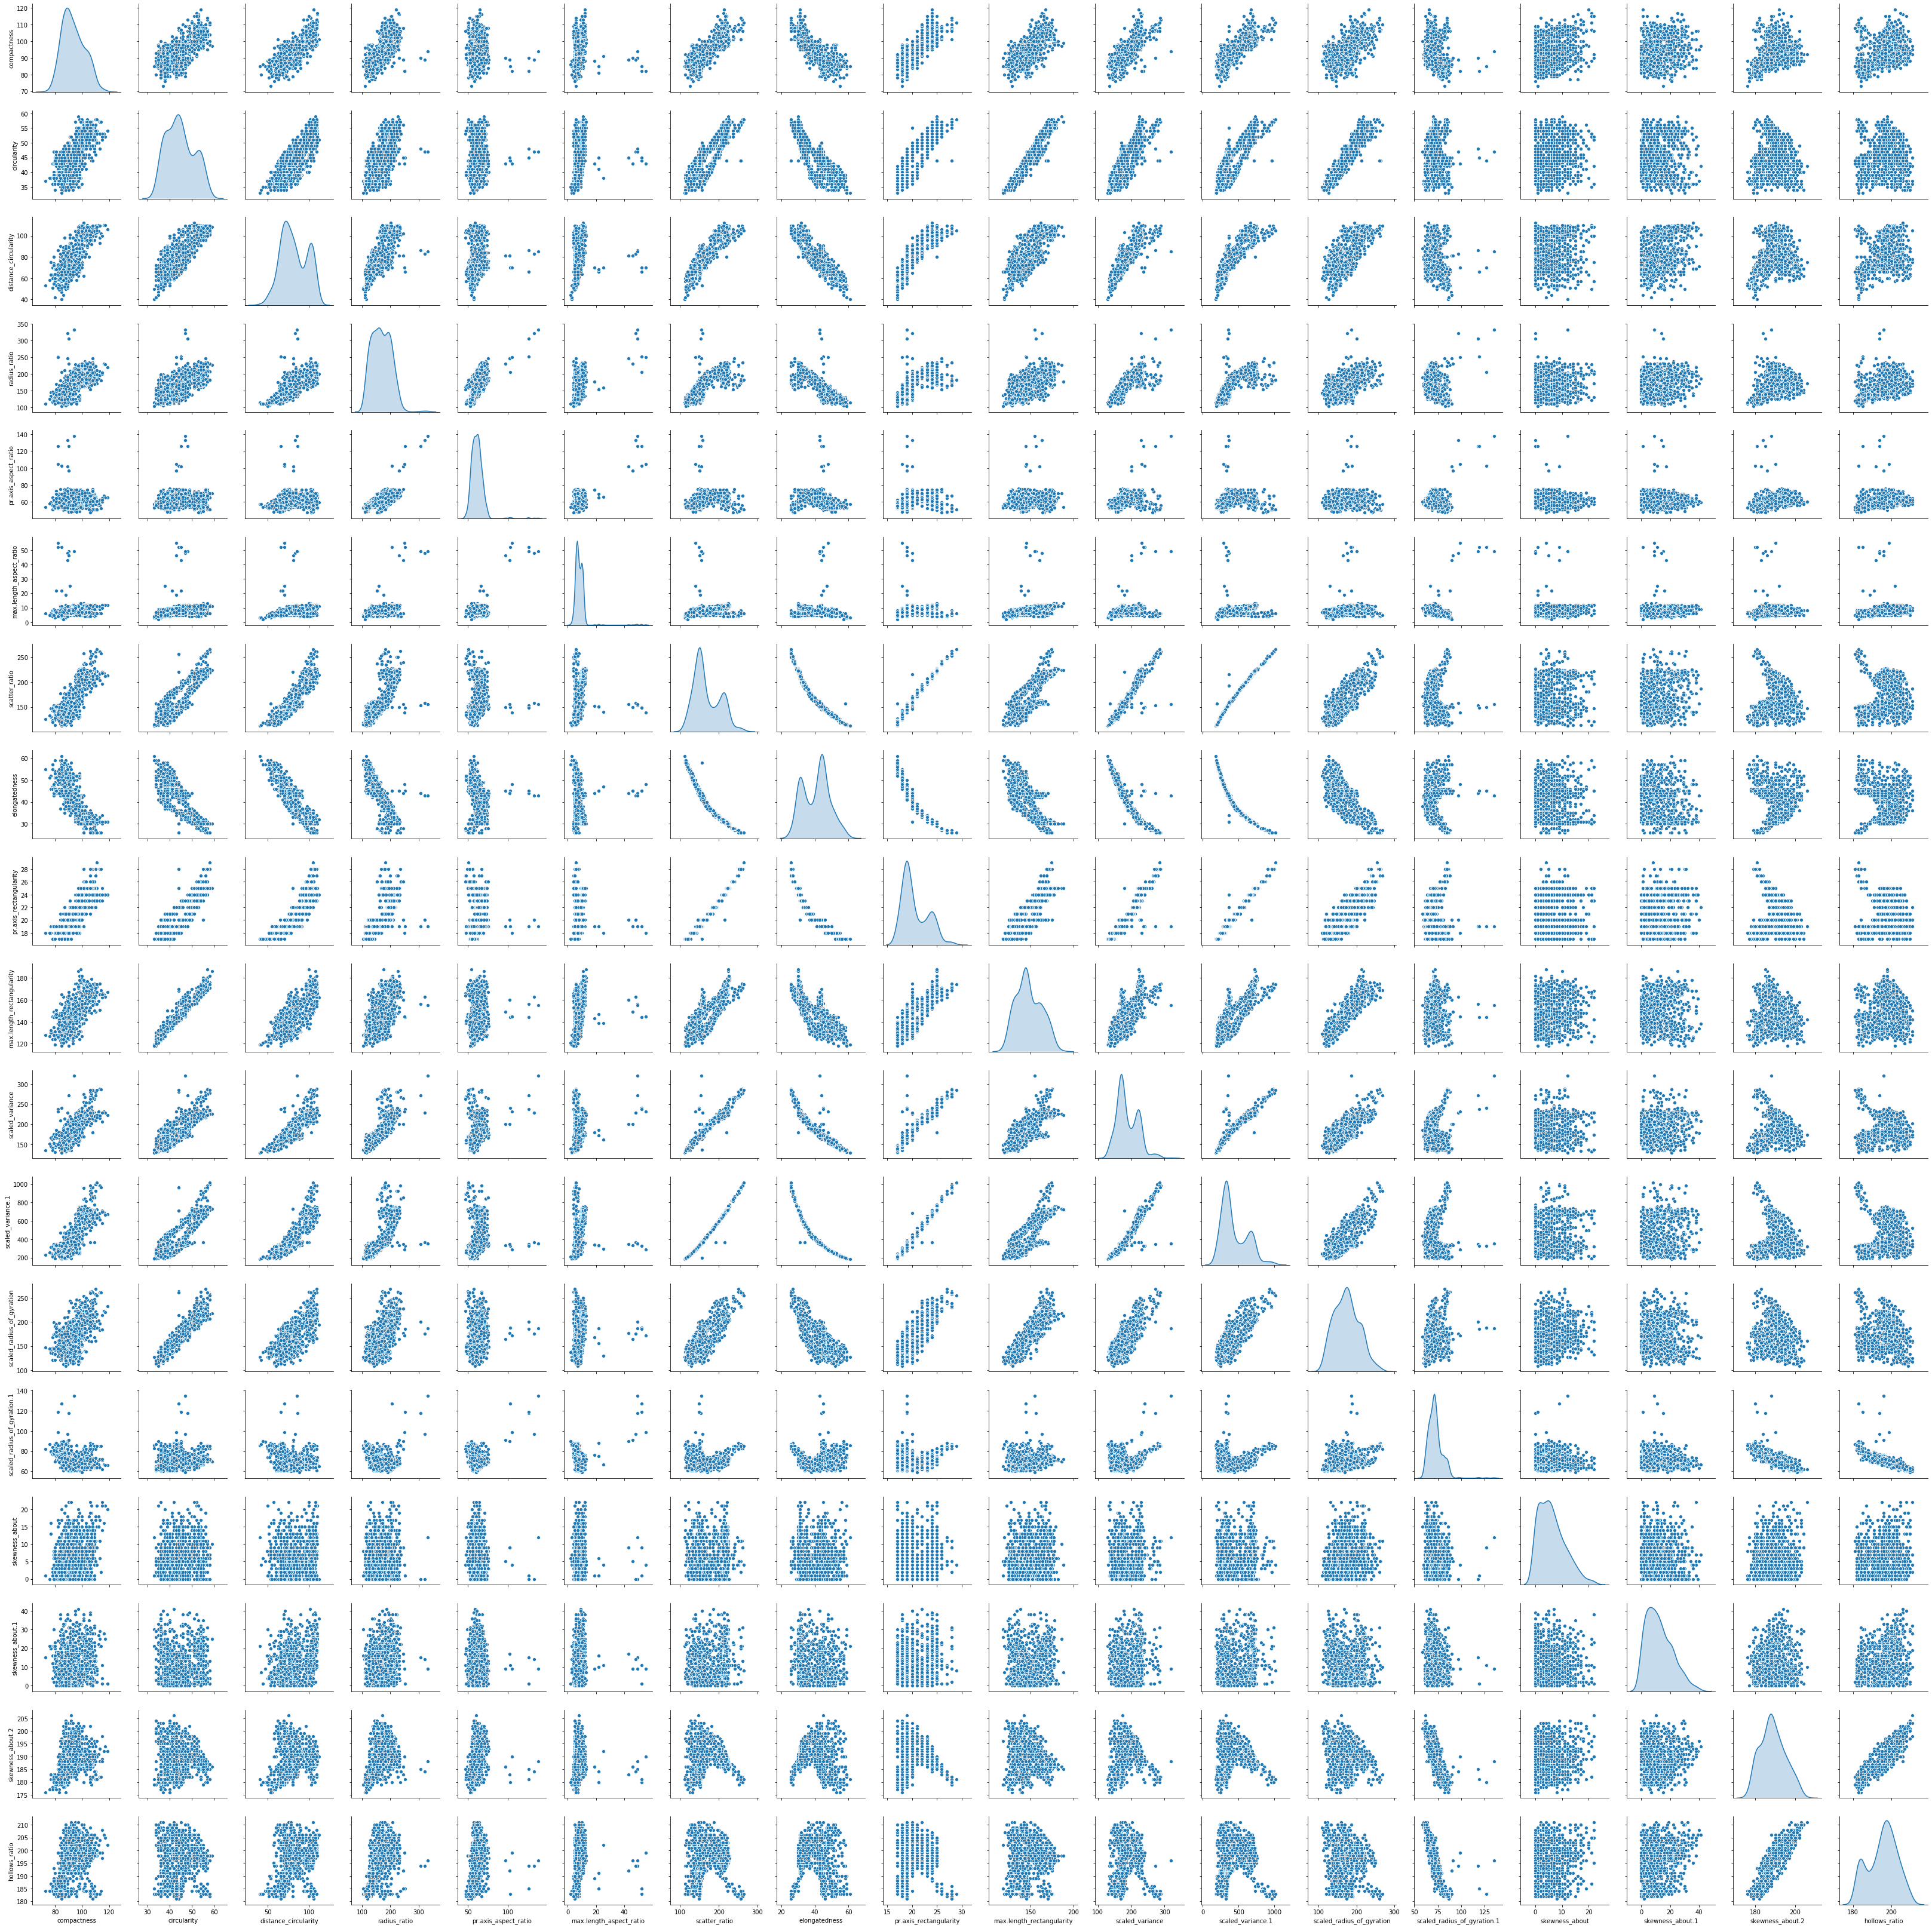

In [961]:
sns.pairplot(data, palette="Set1", diag_kind="kde", height=2.5)

In [17]:
#To find the correlation between the continous variables
correlation=data.corr()
correlation.style.background_gradient(cmap='coolwarm')

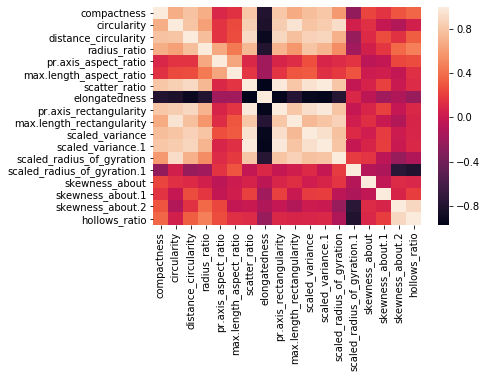

In [963]:
sns.heatmap(correlation)

#### There is strong correlation between the independednt variables

In [964]:
#Dropping the class attribute
new_data=data.drop(['class'],axis=1)

In [965]:
new_data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio  
0             187.0            197  
1             189.0            199  
2             188.0            196  
3             199.0            207  
4             180.0            183

In [966]:
#Import neccessary libraries
from scipy.stats import zscore

## Applying z-score to scale the data and standardize the data

In [967]:
new_data=new_data.apply(zscore)

In [968]:
new_data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.518073              0.057177      0.273363   
1    -0.325470    -0.623732              0.120741     -0.835032   
2     1.254193     0.844303              1.519141      1.202018   
3    -0.082445    -0.623732             -0.006386     -0.295813   
4    -1.054545    -0.134387             -0.769150      1.082192   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.310398                 0.311542      -0.207598   
1             -0.593753                 0.094079      -0.599423   
2              0.548738                 0.311542       1.148719   
3              0.167907                 0.094079      -0.750125   
4              5.245643                 9.444962      -0.599423   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.136262               -0.224342                   0.758332   
1       0.520519               -0.610886                  -0.344578   
2      -1.144597                0.935290                   0.689401   
3       0.648605               -0.610886                  -0.344578   
4       0.520519               -0.610886                  -0.275646   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.401920          -0.341934                   0.285705   
1        -0.593357          -0.619724                  -0.513630   
2         1.097671           1.109379                   1.392477   
3        -0.912419          -0.738777                  -1.466683   
4         1.671982          -0.648070                   0.408680   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.327326       -0.073812          0.380870   
1                    -0.059384        0.538390          0.156798   
2                     0.074587        1.558727         -0.403383   
3                    -1.265121       -0.073812         -0.291347   
4                     7.309005        0.538390         -0.179311   

   skewness_about.2  hollows_ratio  
0         -0.312012       0.183957  
1          0.013265       0.452977  
2         -0.149374       0.049447  
3          1.639649       1.529056  
4         -1.450481      -1.699181

In [969]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 18 columns):
compactness                    846 non-null float64
circularity                    846 non-null float64
distance_circularity           846 non-null float64
radius_ratio                   846 non-null float64
pr.axis_aspect_ratio           846 non-null float64
max.length_aspect_ratio        846 non-null float64
scatter_ratio                  846 non-null float64
elongatedness                  846 non-null float64
pr.axis_rectangularity         846 non-null float64
max.length_rectangularity      846 non-null float64
scaled_variance                846 non-null float64
scaled_variance.1              846 non-null float64
scaled_radius_of_gyration      846 non-null float64
scaled_radius_of_gyration.1    846 non-null float64
skewness_about                 846 non-null float64
skewness_about.1               846 non-null float64
skewness_about.2               846 non-null float64
hollows_rat

In [970]:
new_data=new_data.join(data['class'])

## Removing all columns with z-score greater and lesser than 3 and -3 respectivley as the values are outliers


In [971]:
floats = new_data.columns[new_data.dtypes == 'float64']
for x in floats:
    indexNames_larger = new_data[ new_data[x]>3].index
    indexNames_lesser = new_data[ new_data[x]<-3].index
    # Delete these row indexes from dataFrame
    new_data.drop(indexNames_larger , inplace=True)
    new_data.drop(indexNames_lesser , inplace=True)
    data.drop(indexNames_larger , inplace=True)
    data.drop(indexNames_lesser , inplace=True)
new_data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.518073              0.057177      0.273363   
1    -0.325470    -0.623732              0.120741     -0.835032   
2     1.254193     0.844303              1.519141      1.202018   
3    -0.082445    -0.623732             -0.006386     -0.295813   
5     1.618730    -0.134387              1.519141      0.093623   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.310398                 0.311542      -0.207598   
1             -0.593753                 0.094079      -0.599423   
2              0.548738                 0.311542       1.148719   
3              0.167907                 0.094079      -0.750125   
5             -1.482357                -0.558308       2.595457   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.136262               -0.224342                   0.758332   
1       0.520519               -0.610886                  -0.344578   
2      -1.144597                0.935290                   0.689401   
3       0.648605               -0.610886                  -0.344578   
5      -1.913112                2.868010                   1.447652   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.401920          -0.341934                   0.285705   
1        -0.593357          -0.619724                  -0.513630   
2         1.097671           1.109379                   1.392477   
3        -0.912419          -0.738777                  -1.466683   
5         2.916323           2.934859                   2.745198   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.327326       -0.073812          0.380870   
1                    -0.059384        0.538390          0.156798   
2                     0.074587        1.558727         -0.403383   
3                    -1.265121       -0.073812         -0.291347   
5                     1.682235       -0.277879         -0.403383   

   skewness_about.2  hollows_ratio class  
0         -0.312012       0.183957   van  
1          0.013265       0.452977   van  
2         -0.149374       0.049447   car  
3          1.639649       1.529056   van  
5         -1.287842      -1.699181   bus

In [972]:
data.shape

(824, 19)

In [973]:
new_data=new_data.drop(['class'],axis=1)

In [974]:
new_data.shape

(824, 18)

#### 22 records have been removed as they are outliers

In [975]:
new_data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.518073              0.057177      0.273363   
1    -0.325470    -0.623732              0.120741     -0.835032   
2     1.254193     0.844303              1.519141      1.202018   
3    -0.082445    -0.623732             -0.006386     -0.295813   
5     1.618730    -0.134387              1.519141      0.093623   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.310398                 0.311542      -0.207598   
1             -0.593753                 0.094079      -0.599423   
2              0.548738                 0.311542       1.148719   
3              0.167907                 0.094079      -0.750125   
5             -1.482357                -0.558308       2.595457   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.136262               -0.224342                   0.758332   
1       0.520519               -0.610886                  -0.344578   
2      -1.144597                0.935290                   0.689401   
3       0.648605               -0.610886                  -0.344578   
5      -1.913112                2.868010                   1.447652   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.401920          -0.341934                   0.285705   
1        -0.593357          -0.619724                  -0.513630   
2         1.097671           1.109379                   1.392477   
3        -0.912419          -0.738777                  -1.466683   
5         2.916323           2.934859                   2.745198   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.327326       -0.073812          0.380870   
1                    -0.059384        0.538390          0.156798   
2                     0.074587        1.558727         -0.403383   
3                    -1.265121       -0.073812         -0.291347   
5                     1.682235       -0.277879         -0.403383   

   skewness_about.2  hollows_ratio  
0         -0.312012       0.183957  
1          0.013265       0.452977  
2         -0.149374       0.049447  
3          1.639649       1.529056  
5         -1.287842      -1.699181

In [976]:
data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
5          107         44.0                 106.0         172.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
5                  50.0                        6          255.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
5           26.0                    28.0                        169   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
5            280.0              957.0                      264.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
5                         85.0             5.0               9.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
5             181.0            183   bus

## Principal Component Analysis

### Covariance Matrix

In [977]:
cov_matrix=np.cov(new_data,rowvar=False)
print(cov_matrix)

[[ 0.96647252  0.66618819  0.77169941  0.70502054  0.15231203  0.21988743
   0.77817364 -0.76673337  0.7758366   0.66003326  0.73728717  0.77461135
   0.55434902 -0.24081689  0.2119301   0.1550505   0.31290339  0.38578097]
 [ 0.66618819  0.98917599  0.78416627  0.61574958  0.15641354  0.25947001
   0.82729489 -0.81070411  0.82044423  0.95551205  0.76824613  0.81108634
   0.90740485  0.02471745  0.14016078 -0.01262435 -0.08943115  0.06858521]
 [ 0.77169941  0.78416627  0.99417921  0.77481206  0.18606915  0.3020354
   0.88615337 -0.90174128  0.87147804  0.76697901  0.84359475  0.86335182
   0.68679935 -0.23644178  0.10346267  0.26479055  0.16000099  0.35290061]
 [ 0.70502054  0.61574958  0.77481206  0.91061044  0.45812936  0.20474774
   0.74691602 -0.80539872  0.72015188  0.55691022  0.73314223  0.73075541
   0.52393153 -0.34336544  0.04798923  0.17708154  0.41385209  0.49502129]
 [ 0.15231203  0.15641354  0.18606915  0.45812936  0.51104616  0.0569271
   0.15699338 -0.22801843  0.1357418

In [978]:
#Importing necessary libraries
from sklearn.decomposition import PCA

In [979]:
#Creating the model and fitting the model
pca_model= PCA(n_components=18)

In [980]:
#Fitting the model
pca_model.fit(new_data)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

### Eigen Values

In [981]:
pca_model.explained_variance_

array([9.15481322e+00, 2.90641661e+00, 1.15304678e+00, 9.36455707e-01,
       5.22685990e-01, 4.62834115e-01, 2.24652185e-01, 2.05883618e-01,
       1.00108617e-01, 6.54306582e-02, 5.72013259e-02, 4.29000696e-02,
       2.88870789e-02, 2.27365512e-02, 1.70278759e-02, 1.60084525e-02,
       9.74642855e-03, 3.01797650e-03])

### Eigen Vectors

In [982]:
print(pca_model.components_)

[[ 2.76470454e-01  2.94546206e-01  3.09545125e-01  2.69671354e-01
   7.48445046e-02  8.88506884e-02  3.15954498e-01 -3.17831112e-01
   3.11528996e-01  2.84012537e-01  3.01062353e-01  3.10796305e-01
   2.66813642e-01 -4.63140519e-02  3.94950063e-02  6.02821125e-02
   4.48002574e-02  9.18918296e-02]
 [-1.13618315e-01  1.47757797e-01 -5.56071085e-02 -2.02580965e-01
  -1.72572797e-01 -3.20607021e-02  6.20146562e-02 -3.06016059e-03
   7.36150690e-02  1.38234292e-01  5.46016236e-02  6.46917037e-02
   2.22857117e-01  4.50550062e-01 -3.61301521e-02 -1.19614787e-01
  -5.46921341e-01 -5.36070826e-01]
 [ 6.93126110e-02  1.91950562e-01 -7.70590701e-02 -3.34852217e-02
   5.30657439e-02  2.66076519e-02 -9.93107831e-02  8.30026584e-02
  -9.65887374e-02  1.90159027e-01 -1.20413239e-01 -9.43893986e-02
   2.05555824e-01 -7.29890752e-02  5.74203514e-01 -6.83736800e-01
   1.18428302e-01  5.74914988e-02]
 [ 1.33233809e-01 -6.69612791e-02  6.62169931e-02 -1.62013810e-01
  -3.08587198e-01  2.13682485e-02  1.

### % of variation

In [983]:
print(pca_model.explained_variance_ratio_)

[5.74695389e-01 1.82450934e-01 7.23827620e-02 5.87862105e-02
 3.28117266e-02 2.90545122e-02 1.41025898e-02 1.29243889e-02
 6.28434021e-03 4.10742379e-03 3.59082567e-03 2.69306119e-03
 1.81339265e-03 1.42729194e-03 1.06892861e-03 1.00493409e-03
 6.11834171e-04 1.89454131e-04]


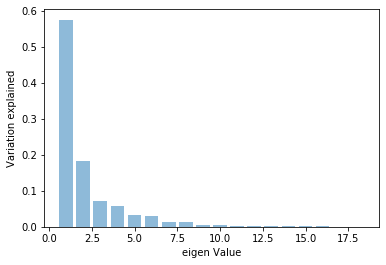

In [984]:
plt.bar(list(range(1,19)),pca_model.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

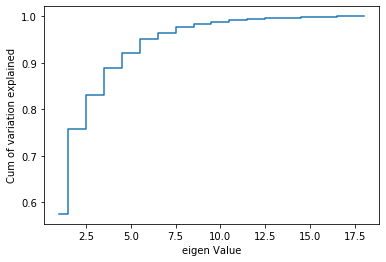

In [985]:
plt.step(list(range(1,19)),np.cumsum(pca_model.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

## Dimensionality Reduction

### Now 6 dimensions seems good. With 6 variables we can explain over 95% of the variation in the original data

In [986]:
PCA_6dim= PCA(n_components=6)

In [987]:
PCA_6dim.fit(new_data)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

### Eigen Vectors

In [988]:
print(PCA_6dim.components_)

[[ 0.27647045  0.29454621  0.30954512  0.26967135  0.0748445   0.08885069
   0.3159545  -0.31783111  0.311529    0.28401254  0.30106235  0.31079631
   0.26681364 -0.04631405  0.03949501  0.06028211  0.04480026  0.09189183]
 [-0.11361831  0.1477578  -0.05560711 -0.20258096 -0.1725728  -0.0320607
   0.06201466 -0.00306016  0.07361507  0.13823429  0.05460162  0.0646917
   0.22285712  0.45055006 -0.03613015 -0.11961479 -0.54692134 -0.53607083]
 [ 0.06931261  0.19195056 -0.07705907 -0.03348522  0.05306574  0.02660765
  -0.09931078  0.08300266 -0.09658874  0.19015903 -0.12041324 -0.0943894
   0.20555582 -0.07298908  0.57420351 -0.6837368   0.1184283   0.0574915 ]
 [ 0.13323381 -0.06696128  0.06621699 -0.16201381 -0.3085872   0.02136825
   0.0148496   0.0581957   0.0369879  -0.0386027  -0.02353303  0.01587967
  -0.0537869   0.00994694  0.73234426  0.54791714 -0.06615421 -0.01636976]
 [ 0.06284371 -0.27191007 -0.13132679  0.32019355  0.3943687  -0.33054919
   0.09957109 -0.14707534  0.07464697

### Eigen values

In [989]:
print(PCA_6dim.explained_variance_)

[9.15481322 2.90641661 1.15304678 0.93645571 0.52268599 0.46283412]


### % of variance

In [990]:
print(PCA_6dim.explained_variance_ratio_)

[0.57469539 0.18245093 0.07238276 0.05878621 0.03281173 0.02905451]


In [991]:
# Transforming the data
PCA_6dimT=PCA_6dim.transform(new_data)

In [992]:
PCA_6dimT

array([[ 0.40925166, -0.24190907,  0.20820349, -0.33039315, -0.38042388,
        -1.55994754],
       [-1.50178147, -0.408475  ,  0.20327428,  0.83826074, -0.54342422,
         0.13921143],
       [ 3.82232205,  0.32940912,  1.16209498,  0.65555336,  0.90027844,
        -0.23195531],
       ...,
       [ 4.88144811,  0.12846191,  0.34092473, -1.4073329 , -0.21350075,
         0.25151787],
       [-3.18105118, -1.07507443, -1.9161865 ,  0.12387725, -0.44459985,
        -0.08389736],
       [-4.69224341,  0.24107758, -1.22561135,  0.10737126, -0.46251481,
         0.23287709]])

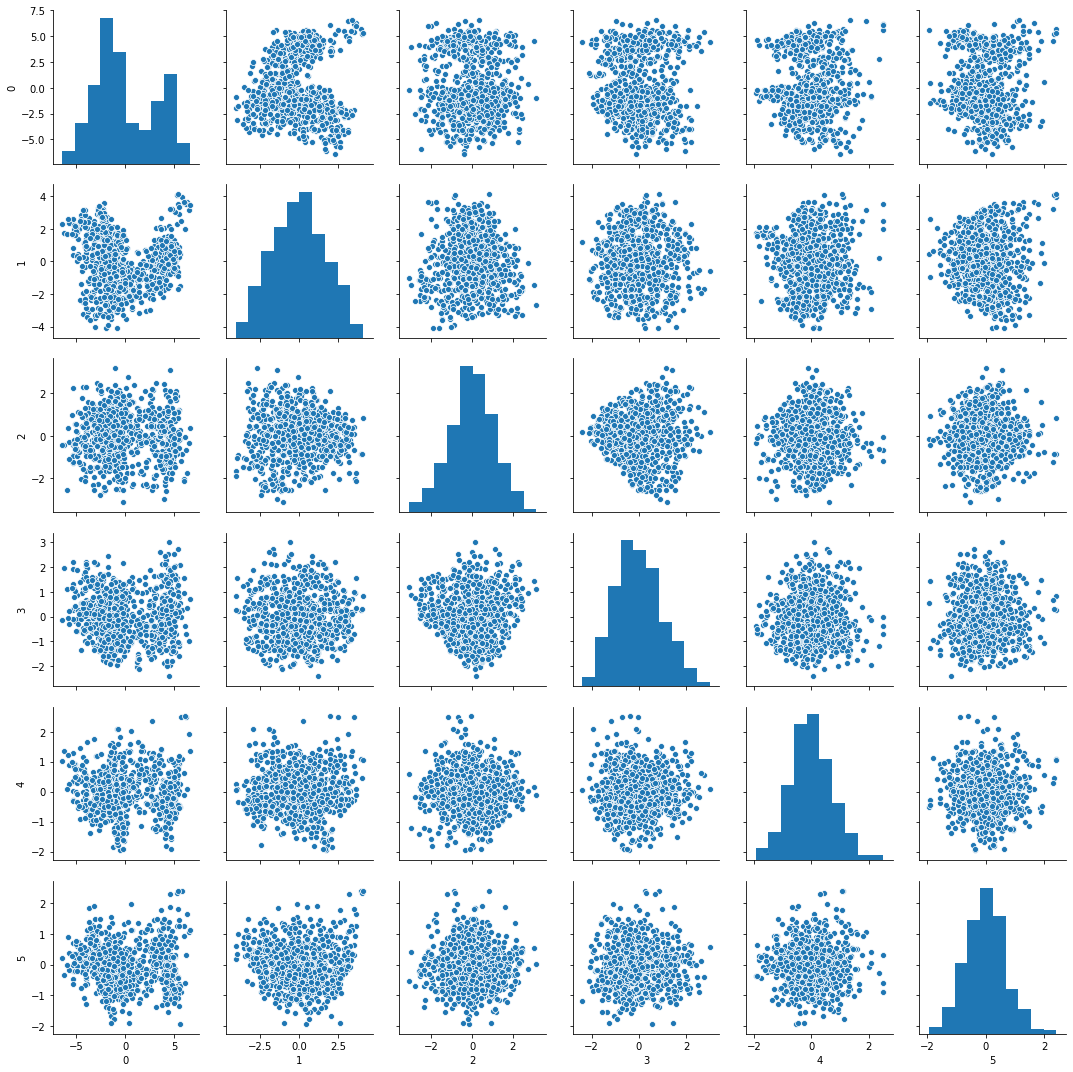

In [993]:
sns.pairplot(pd.DataFrame(PCA_6dimT))

### Now the independent variables are not corrleated and are truly independednt

### Created PCA data frame

In [994]:
PCA_data=pd.DataFrame(PCA_6dimT)
PCA_data.head()

0         1         2         3         4         5
0  0.409252 -0.241909  0.208203 -0.330393 -0.380424 -1.559948
1 -1.501781 -0.408475  0.203274  0.838261 -0.543424  0.139211
2  3.822322  0.329409  1.162095  0.655553  0.900278 -0.231955
3 -1.570803 -2.850830  0.428992 -0.229171 -0.635205  0.306427
4  5.742567  3.955068 -0.864786  0.264724  1.107116  2.415919

# Support Vector Classifier- without PCA, Hyper-parameterization and Cross-validation

### Defining X(Independednt Attributes) and Y(Dependednt Attributes) 

In [995]:
#importing necessary libraries
from sklearn.model_selection import train_test_split

In [996]:
# Deternmining the indepedent and dependent variales (X and Y)
X=new_data

In [997]:
#Changing class to numerical representation 
Target_dict={'class':{'car':0,'van':1,'bus':2}}

data.replace(Target_dict, inplace=True)

data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
5          107         44.0                 106.0         172.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
5                  50.0                        6          255.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
5           26.0                    28.0                        169   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
5            280.0              957.0                      264.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
5                         85.0             5.0               9.0   

   skewness_about.2  hollows_ratio  class  
0             187.0            197      1  
1             189.0            199      1  
2             188.0            196      0  
3             199.0            207      1  
5             181.0            183      2

In [998]:
Y=data['class']

In [999]:
# Checking the shape of X and Y
X.shape

(824, 18)

In [1000]:
Y.shape

(824,)

#### Splitting the data to 70% training data and 30% test data

In [1001]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.3,random_state=1)
Xtrain.head()

compactness  circularity  distance_circularity  radius_ratio  \
98      0.160580     0.191843              1.455577      1.501584   
35      0.768143     0.191843             -0.133514      0.093623   
613    -0.203957    -1.276191             -0.451332      0.662799   
253     0.039068    -0.297502             -0.896277      0.033710   
270    -1.419082     0.028728             -0.896277     -0.565422   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
98               0.802624                 0.094079       0.967877   
35               0.675681                 0.094079      -0.358300   
613              1.183454                -0.558308      -0.237738   
253              0.675681                -0.558308      -0.810406   
270              0.929568                -0.775770      -0.629563   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
98       -1.016511                0.935290                   0.000081   
35        0.264347               -0.224342                   0.137945   
613      -0.119910               -0.224342                  -1.378557   
253       0.648605               -0.997430                  -0.413510   
270       0.520519               -0.610886                  -0.275646   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
98          1.097671           0.922296                   0.808347   
35         -0.593357          -0.432641                   0.285705   
613        -0.274295          -0.262565                  -1.220734   
253        -0.784794          -0.733108                   0.070500   
270        -0.625263          -0.665078                   0.285705   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
98                     -0.461296       -0.277879          2.845668   
35                     -0.729238        2.170928         -0.627456   
613                    -0.461296       -1.094148          0.156798   
253                    -0.997179        0.742458         -0.515420   
270                     1.012381       -0.277879         -1.411710   

     skewness_about.2  hollows_ratio  
98           0.338542       0.856507  
35           0.501180       0.587487  
613          0.989095       0.856507  
253          1.477010       0.991016  
270         -1.287842      -1.564671

In [1002]:
#importing necessary libraries
from sklearn.svm import SVC

In [1003]:
model_svc=SVC()

In [1004]:
#fitting the data
model_svc.fit(Xtrain,Ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [1005]:
Ypred=model_svc.predict(Xtest)

In [1006]:
#Checking the score for SVC
SVC_Trainscore=model_svc.score(Xtrain,Ytrain)
print("The score for SVC-Training Data is {0:.2f}%".format(SVC_Trainscore*100))
SVC_Testscore=model_svc.score(Xtest,Ytest)
print("The score for SVC-Test Data is {0:.2f}%".format(SVC_Testscore*100))

The score for SVC-Training Data is 98.09%
The score for SVC-Test Data is 97.98%


In [1007]:
#Misclassification error
SVC_MSE=1-SVC_Testscore
print("Misclassification error of SVC model is {0:.1f}%".format(SVC_MSE*100))

Misclassification error of SVC model is 2.0%


In [1008]:
accuracy_score=metrics.accuracy_score(Ytest,Ypred)
percision_score=metrics.precision_score(Ytest,Ypred,average='micro')
recall_score=metrics.recall_score(Ytest,Ypred,average='micro')
f1_score=metrics.f1_score(Ytest,Ypred,average='micro')
print("The Accuracy of this model is {0:.2f}%".format(accuracy_score*100))
print("The Percission of this model is {0:.2f}%".format(percision_score*100))
print("The Recall score of this model is {0:.2f}%".format(recall_score*100))
print("The f1 score of this model is {0:.2f}%".format(f1_score*100))

The Accuracy of this model is 97.98%
The Percission of this model is 97.98%
The Recall score of this model is 97.98%
The f1 score of this model is 97.98%


# Support Vector Classifier- with PCA, Hyper-parameterization and Cross validation

### Defining X(Independednt Attributes) and Y(Dependednt Attributes) 

In [1009]:
# Deternmining the indepedent and dependent variales (X and Y)
X=PCA_data

In [1010]:
Y=data['class']

In [1011]:
# Checking the shape of X and Y
X.shape

(824, 6)

In [1012]:
Y.shape


(824,)

## Splitting the data with k-fold cross-validation

In [1013]:
# simulate splitting a dataset of 25 observations into 5 folds
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
kf.get_n_splits(X)
print(kf)


for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

KFold(n_splits=10, random_state=None, shuffle=False)
TRAIN: [ 83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100
 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136
 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154
 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172
 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190
 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208
 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226
 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244
 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262
 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280
 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298
 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314

## Using Grid Search  for hyper-parameterization

In [1014]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

parameters = {'kernel':('linear', 'rbf'), 'C':[0.01, 0.05, 0.5, 1]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train,y_train)
clf.best_params_

{'C': 1, 'kernel': 'rbf'}

## The above is the best parameter from Grid Search

In [1015]:
#fitting the data
model_svc_PCA=SVC(C=1, kernel= 'rbf')
model_svc_PCA.fit(X_train,y_train)
scores = cross_val_score(model_svc_PCA, X, Y, cv=5,scoring='f1_macro')
scores

array([0.89538665, 0.85269266, 0.88906724, 0.85691349, 0.87060911])

## The above are the cross validation score and our accuracy should be in the above range

In [1016]:
Ypred=model_svc_PCA.predict(X_test)

In [1017]:
#Checking the score for SVC
SVC_Trainscore=model_svc_PCA.score(X_train,y_train)
print("The score for SVC-Training Data is {0:.2f}%".format(SVC_Trainscore*100))
SVC_Testscore=model_svc_PCA.score(X_test,y_test)
print("The score for SVC-Test Data is {0:.2f}%".format(SVC_Testscore*100))

The score for SVC-Training Data is 90.57%
The score for SVC-Test Data is 85.37%


In [1018]:
#Misclassification error
SVC_MSE=1-SVC_Testscore
print("Misclassification error of SVC model is {0:.1f}%".format(SVC_MSE*100))

Misclassification error of SVC model is 14.6%


In [1019]:
accuracy_score=metrics.accuracy_score(y_test,Ypred)
percision_score=metrics.precision_score(y_test,Ypred,average='macro')
recall_score=metrics.recall_score(y_test,Ypred,average='macro')
f1_score=metrics.f1_score(y_test,Ypred,average='macro')
print("The Accuracy of this model is {0:.2f}%".format(accuracy_score*100))
print("The Percission of this model is {0:.2f}%".format(percision_score*100))
print("The Recall score of this model is {0:.2f}%".format(recall_score*100))
print("The f1 score of this model is {0:.2f}%".format(f1_score*100))

The Accuracy of this model is 85.37%
The Percission of this model is 84.48%
The Recall score of this model is 85.85%
The f1 score of this model is 84.97%


## Verdict:
### 1. Data was read and understood and missing values were filled with their respective median
### 2. Exploratory Data analytics was performed- univariate and multivariate
### 3. Target was dropped 
### 4. Data was standardized using z-score
### 5. Outliers were removed from the data-set
### 6. PCA was performed and 6 dimensions was selected that explained 95% of the variance in the data
### 7. Dimensions were reduced to 6 from 18 and PCA data-set was created
### 8. Support vector classifier was performed with the original data and accuracy and other performance metrics were identified
### 9. Support vector classifier was performed with PCA data with K-fold cross validation and Hyper parameterization using GridSearchCV and accuracy other performance metrics were identified
### 10. Accuracy other performance metrics are lower with PCA data that with scaled data but this is with just 6 dimensions as opposed to 18

## K-Means Clustering with original data- Unsupervised model

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

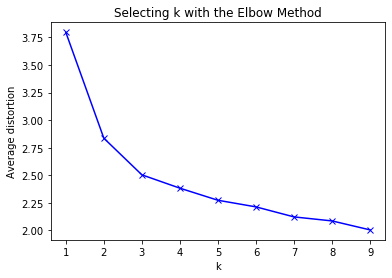

In [1020]:
#Finding optimal no. of clusters
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(new_data)
    prediction=model.predict(new_data)
    meanDistortions.append(sum(np.min(cdist(new_data, model.cluster_centers_, 'euclidean'), axis=1)) / new_data.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')


### 3 clusters seems optimal when looking into the elbow point

In [1021]:
kmeans_model=KMeans(3)
kmeans_model.fit(new_data)
prediction=kmeans_model.predict(new_data)

#Append the prediction 
#new_data["GROUP"] = prediction
data["GROUP"] = prediction
print("Groups Assigned : \n")
data.head(10)

Groups Assigned : 



compactness  circularity  distance_circularity  radius_ratio  \
0            95         48.0                  83.0         178.0   
1            91         41.0                  84.0         141.0   
2           104         50.0                 106.0         209.0   
3            93         41.0                  82.0         159.0   
5           107         44.0                 106.0         172.0   
6            97         43.0                  73.0         173.0   
7            90         43.0                  66.0         157.0   
8            86         34.0                  62.0         140.0   
9            93         44.0                  98.0         167.0   
10           86         36.0                  70.0         143.0   

    pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                   72.0                       10          162.0   
1                   57.0                        9          149.0   
2                   66.0                       10          207.0   
3                   63.0                        9          144.0   
5                   50.0                        6          255.0   
6                   65.0                        6          153.0   
7                   65.0                        9          137.0   
8                   61.0                        7          122.0   
9                   62.0                       11          183.0   
10                  61.0                        9          133.0   

    elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0            42.0                    20.0                        159   
1            45.0                    19.0                        143   
2            32.0                    23.0                        158   
3            46.0                    19.0                        143   
5            26.0                    28.0                        169   
6            42.0                    19.0                        143   
7            48.0                    18.0                        146   
8            54.0                    17.0                        127   
9            36.0                    22.0                        146   
10           50.0                    18.0                        130   

    scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0             176.0              379.0                      184.0   
1             170.0              330.0                      158.0   
2             223.0              635.0                      220.0   
3             160.0              309.0                      127.0   
5             280.0              957.0                      264.0   
6             176.0              361.0                      172.0   
7             162.0              281.0                      164.0   
8             141.0              223.0                      112.0   
9             202.0              505.0                      152.0   
10            153.0              266.0                      127.0   

    scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                          70.0             6.0              16.0   
1                          72.0             9.0              14.0   
2                          73.0            14.0               9.0   
3                          63.0             6.0              10.0   
5                          85.0             5.0               9.0   
6                          66.0            13.0               1.0   
7                          67.0             3.0               3.0   
8                          64.0             2.0              14.0   
9                          64.0             4.0              14.0   
10                         66.0             2.0              10.0   

    skewness_about.2  hollows_ratio  class  GROUP  
0              187.0            197      1      0  
1              189.0            199      1      0  
2              188.0            196  

In [1022]:
data.groupby(['GROUP'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025B3C0360B8>,
      dtype=object)

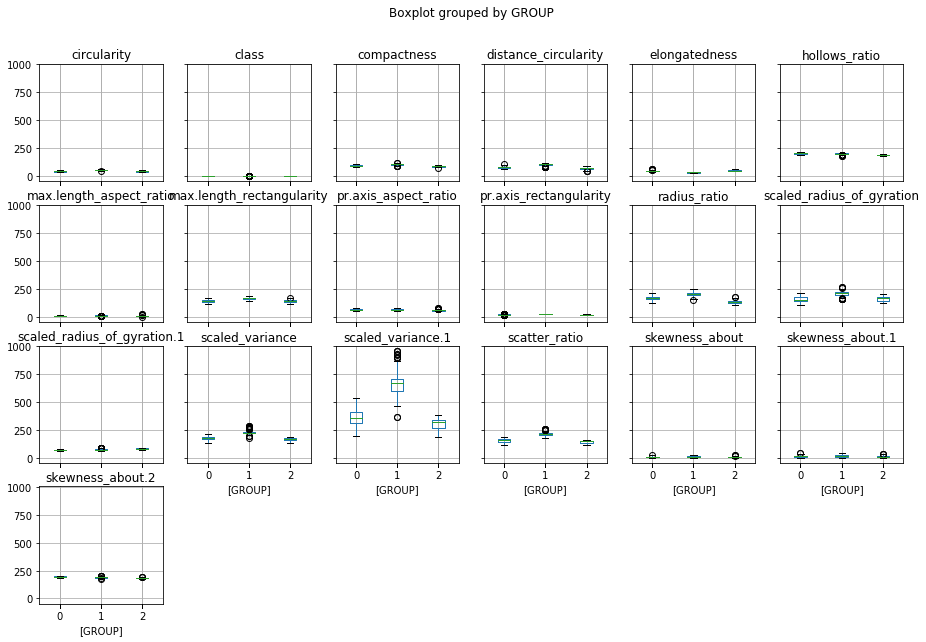

In [1023]:
data.boxplot(by='GROUP', layout = (4,6),figsize=(15,10))

### Evaluating the K-means model using mallows_score and Silhoutte_score

In [1024]:
metrics.fowlkes_mallows_score(data['class'],data['GROUP'])

0.4240407641716312

In [1025]:
metrics.silhouette_score(new_data, kmeans_model.labels_, metric='euclidean')

0.3038209000477113

In [1026]:
data=data.drop(['GROUP'],axis=1)
data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
5          107         44.0                 106.0         172.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
5                  50.0                        6          255.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
5           26.0                    28.0                        169   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
5            280.0              957.0                      264.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
5                         85.0             5.0               9.0   

   skewness_about.2  hollows_ratio  class  
0             187.0            197      1  
1             189.0            199      1  
2             188.0            196      0  
3             199.0            207      1  
5             181.0            183      2

## K-Means Clustering with PCA data

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

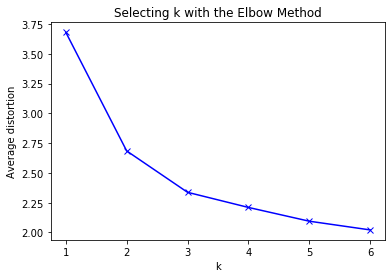

In [1027]:
#Finding optimal no. of clusters
clusters=range(1,7)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(PCA_data)
    prediction=model.predict(PCA_data)
    meanDistortions.append(sum(np.min(cdist(PCA_data, model.cluster_centers_, 'euclidean'), axis=1)) / PCA_data.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

### 3 clusters seems optimal when looking into the elbow point

In [1028]:
kmeans_model=KMeans(3)
kmeans_model.fit(PCA_data)
prediction=kmeans_model.predict(PCA_data)

#Append the prediction 
data["GROUP"] = prediction
print("Groups Assigned : \n")
data.head(10)

Groups Assigned : 



compactness  circularity  distance_circularity  radius_ratio  \
0            95         48.0                  83.0         178.0   
1            91         41.0                  84.0         141.0   
2           104         50.0                 106.0         209.0   
3            93         41.0                  82.0         159.0   
5           107         44.0                 106.0         172.0   
6            97         43.0                  73.0         173.0   
7            90         43.0                  66.0         157.0   
8            86         34.0                  62.0         140.0   
9            93         44.0                  98.0         167.0   
10           86         36.0                  70.0         143.0   

    pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                   72.0                       10          162.0   
1                   57.0                        9          149.0   
2                   66.0                       10          207.0   
3                   63.0                        9          144.0   
5                   50.0                        6          255.0   
6                   65.0                        6          153.0   
7                   65.0                        9          137.0   
8                   61.0                        7          122.0   
9                   62.0                       11          183.0   
10                  61.0                        9          133.0   

    elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0            42.0                    20.0                        159   
1            45.0                    19.0                        143   
2            32.0                    23.0                        158   
3            46.0                    19.0                        143   
5            26.0                    28.0                        169   
6            42.0                    19.0                        143   
7            48.0                    18.0                        146   
8            54.0                    17.0                        127   
9            36.0                    22.0                        146   
10           50.0                    18.0                        130   

    scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0             176.0              379.0                      184.0   
1             170.0              330.0                      158.0   
2             223.0              635.0                      220.0   
3             160.0              309.0                      127.0   
5             280.0              957.0                      264.0   
6             176.0              361.0                      172.0   
7             162.0              281.0                      164.0   
8             141.0              223.0                      112.0   
9             202.0              505.0                      152.0   
10            153.0              266.0                      127.0   

    scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                          70.0             6.0              16.0   
1                          72.0             9.0              14.0   
2                          73.0            14.0               9.0   
3                          63.0             6.0              10.0   
5                          85.0             5.0               9.0   
6                          66.0            13.0               1.0   
7                          67.0             3.0               3.0   
8                          64.0             2.0              14.0   
9                          64.0             4.0              14.0   
10                         66.0             2.0              10.0   

    skewness_about.2  hollows_ratio  class  GROUP  
0              187.0            197      1      1  
1              189.0            199      1      1  
2              188.0            196  

In [1029]:
data.groupby(['GROUP'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025B8BAB4B38>,
      dtype=object)

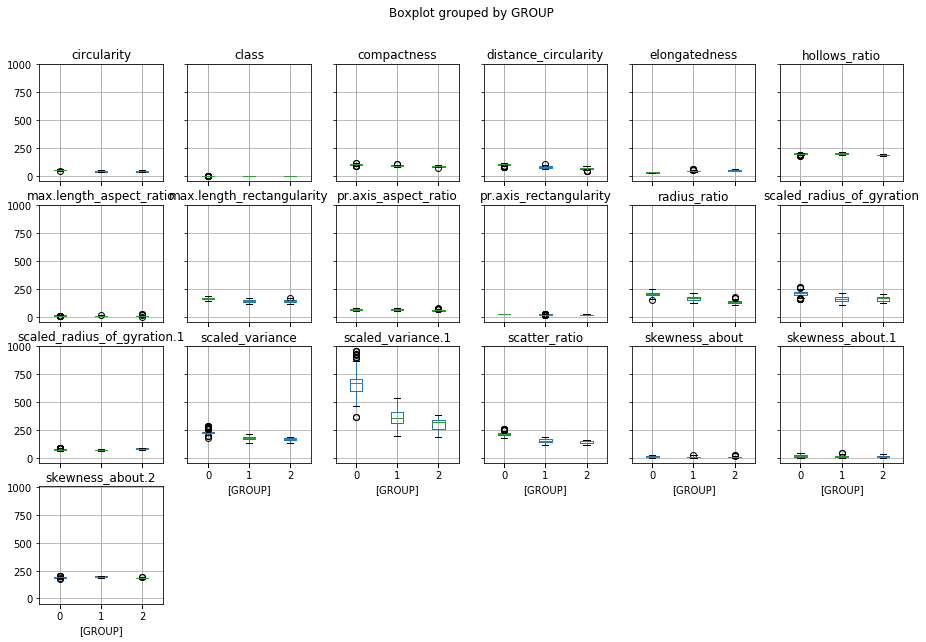

In [1030]:
data.boxplot(by='GROUP', layout = (4,6),figsize=(15,10))

### Evaluating the K-means model using mallows_score and Silhoutte_score

In [1031]:
metrics.fowlkes_mallows_score(data['class'],data['GROUP'])

0.42442443976736216

In [1032]:
metrics.silhouette_score(PCA_data, kmeans_model.labels_, metric='euclidean')

0.3266983767947996

In [1033]:
data=data.drop(['GROUP'],axis=1)
data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
5          107         44.0                 106.0         172.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
5                  50.0                        6          255.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
5           26.0                    28.0                        169   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
5            280.0              957.0                      264.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
5                         85.0             5.0               9.0   

   skewness_about.2  hollows_ratio  class  
0             187.0            197      1  
1             189.0            199      1  
2             188.0            196      0  
3             199.0            207      1  
5             181.0            183      2